**Central 156**

Análise do conteúdo dos dados abertos do serviço 156 disponibilizados pela PMC

Exemplo de arquivo: http://dadosabertos.c3sl.ufpr.br/curitiba/156/2019-03-01_156_-_Base_de_Dados.csv

Problemas encontrados no arquivo CSV:
- Cabeçalho não possui a última coluna, dessa forma todos os registros possuem uma coluna a mais que o cabeçalho;
- Na coluna "RESPOSTA_FINAL" o valor 'Retirada da Pendência de Revisão\r\n;'  está com quebra de linha gerando inconsistência;
- A data está em formato 'dd/MM/yyyy' e possui espaços no final do valor;

In [1]:
original_file_name = '2019-03-01_156_-_Base_de_Dados.csv'

In [2]:
# Valor na coluna "RESPOSTA_FINAL" está com quebra de linha.
# Tem que ser pré-processado para remover a quebra de linha em 'Retirada da Pendência de Revisão\r\n;'

# Read in the file
with open(original_file_name, 'r', encoding='ISO-8859-1') as file :
  filedata = file.read()

# Replace the target string
filedata = filedata.replace('Retirada da Pendência de Revisão\n;', 'Retirada da Pendência de Revisão;')

file_name = 'temp_' + original_file_name
# Write the file out again
with open(file_name, 'w', encoding='ISO-8859-1') as file:
  file.write(filedata)

In [3]:
# Colunas adicionadas manualmente pois o HEADER do arquivo não possui a última coluna (adicionada como 'STATUS')
columns = ['SOLICITACAO', 'TIPO', 'ORGAO', 'DATA', 'HORARIO', 'ASSUNTO',
       'SUBDIVISAO', 'DESCRICAO', 'LOGRADOURO_ASS', 'BAIRRO_ASS',
       'REGIONAL_ASS', 'MEIO_RESPOSTA', 'OBSERVACAO', 'SEXO', 'BAIRRO_CIDADAO',
       'REGIONAL_CIDADAO', 'DATA_NASC', 'TIPO_CIDADAO', 'ORGAO_RESP',
       'RESPOSTA_FINAL', 'STATUS']

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(file_name, 
                 encoding="ISO-8859-1", 
                 sep=";", 
                 index_col=False, 
                 skiprows=2, 
                 names = columns,
                 escapechar='\\')

In [6]:
# Quantidade de registros do arquivo
len(df)

19342

In [7]:
# Conteúdo dos registros (top 5)
df.head(5)

,SOLICITACAO,TIPO,ORGAO,DATA,HORARIO,ASSUNTO,SUBDIVISAO,DESCRICAO,LOGRADOURO_ASS,BAIRRO_ASS,...,MEIO_RESPOSTA,OBSERVACAO,SEXO,BAIRRO_CIDADAO,REGIONAL_CIDADAO,DATA_NASC,TIPO_CIDADAO,ORGAO_RESP,RESPOSTA_FINAL,STATUS
0,7669446,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/02/2019,12:47:28,ILUMINAÇÃO PÚBLICA,MANUTENÇÃO DE LUMINÁRIAS,SOLICITA A MANUTENÇÃO DE LUMINÁRIA. SEGUE DESC...,"ANTONIO ZANON, 575",TATUQUARA,...,EMAIL,NaN,M,TATUQUARA,Unidade Regional Tatuquara,18/10/1969,CIDADÃO,SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS,Conclusão - Automática,SOLICITACAO ATENDIDA
1,7669459,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/02/2019,12:51:32,ILUMINAÇÃO PÚBLICA,MANUTENÇÃO DE LUMINÁRIAS,SOLICITA A MANUTENÇÃO DE LUMINÁRIA. SEGUE DESC...,"PRESIDENTE JOAO GOULART, 1495",TATUQUARA,...,EMAIL,NÃO INFORMOU PLACA DE IDENTIFICAÇÃO DO POSTE.,M,TATUQUARA,Unidade Regional Tatuquara,18/10/1969,CIDADÃO,SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS,Conclusão - Automática,SOLICITACAO ATENDIDA
2,7669527,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,01/02/2019,13:27:28,ILUMINAÇÃO PÚBLICA,MANUTENÇÃO DE LUMINÁRIAS,SOLICITA A MANUTENÇÃO DE LUMINÁRIA. SEGUE DESC...,"URBANO BIER FILHO, 113",TATUQUARA,...,EMAIL,INFORMA QUE: TRANSVERSAL 1 : CONCEIÇÃO MARIA V...,M,TATUQUARA,Unidade Regional Tatuquara,18/10/1969,CIDADÃO,SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS,Conclusão - Automática,SOLICITACAO ATENDIDA
3,7670731,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,02/02/2019,10:26:17,PASSEIO,ROÇADA,"SOLICITA ROÇADA DE RUA, A LIMPEZA DEVE SER REA...","JOVENILSON AMÉRICO DE OLIVEIRA, 0",TATUQUARA,...,EMAIL,NaN,M,TATUQUARA,Unidade Regional Tatuquara,18/10/1969,CIDADÃO,SECRETARIA DO GOVERNO MUNICIPAL,Conclusão - Automática,Solicitação atendida
4,7671586,SOLICITAÇÃO,INSTITUTO DAS CIDADES INTELIGENTES,03/02/2019,13:43:41,DRENAGEM,REPOSIÇÃO DE TAMPA/RALO/GRELHA DE CAIXA DE CAP...,SOLICITA REPOSIÇÃO DE TAMPA DA CAIXA DE CAPTAÇ...,"DESEMBARGADOR ERNANI ALMEIDA DE ABREU, 596",TATUQUARA,...,EMAIL,NaN,M,TATUQUARA,Unidade Regional Tatuquara,18/10/1969,CIDADÃO,SECRETARIA DO GOVERNO MUNICIPAL,Conclusão - Automática,Solicitação Atendida.


In [8]:
# tratamento dos valores na coluna data removendo espaços vazios e transformando em data
df['DATA'] = df['DATA'].str.strip()

In [9]:
from datetime import datetime
df['DATA'] = [datetime.strptime(x, '%d/%m/%Y') for x in df['DATA']]
df['DATA'].head(5)

0   2019-02-01
1   2019-02-01
2   2019-02-01
3   2019-02-02
4   2019-02-03
Name: DATA, dtype: datetime64[ns]

In [10]:
df['TIPO'].unique()

array(['SOLICITAÇÃO', 'RECLAMAÇÃO', 'ELOGIO', 'INFORMAÇÃO', 'RECADASTRO',
       'SUGESTÃO', 'DENÚNCIA'], dtype=object)

In [11]:
df['ORGAO'].unique()

array(['INSTITUTO DAS CIDADES INTELIGENTES',
       'SECRETARIA DO GOVERNO MUNICIPAL', 'SECRETARIA MUNICIPAL DA SAÚDE',
       'FUNDAÇÃO DE AÇÃO SOCIAL', 'URBANIZAÇÃO DE CURITIBA', 'SISTEMA GTL'], dtype=object)

In [12]:
df['ASSUNTO'].unique()

array(['ILUMINAÇÃO PÚBLICA', 'PASSEIO', 'DRENAGEM', 'SEMÁFORO', 'PARQUES',
       'MOTORISTAS, COBRADORES E PORTEIROS', 'LIMPEZA',
       'PLACAS DE NOMENCLATURA DE RUAS',
       'TERMINAIS/ESTAÇÕES TUBO (PROJETOS)', 'POSTO DE SAÚDE',
       'ARMAZÉM DA FAMÍLIA', 'COLETA', 'TRÂNSITO', 'DISQUE SOLIDARIEDADE',
       'FLOREIRAS', 'ESTAR', 'UNIDADE DE SAÚDE 24H',
       'PAINÉIS DE MENSAGENS VARIÁVEIS', 'ABORDAGEM SOCIAL DE RUA',
       'FISCALIZAÇÃO DE OBRAS',
       'FISCALIZAÇÃO DE TERRENOS BALDIOS OU EDIFICADOS',
       'PROFISSIONAIS/SERVIÇOS CREDENCIADOS', 'POLUIÇÃO',
       'CENTRO DE ATENÇÃO PSICOSSOCIAL - CAPS', 'CARTÃO TRANSPORTE',
       'ESCOLAS MUNICIPAIS', 'OUTROS SETORES SMS', 'CRM-AF/SMS',
       'VIGILÂNCIA EM SAÚDE AMBIENTAL', 'PAVIMENTAÇÃO',
       'FAUNA SINANTRÓPICA', 'DIRETORIA DE URGÊNCIA E EMERGÊNCIA',
       'ÁRVORE', 'PONTO DE ÔNIBUS', 'ÔNIBUS', 'NUMERAÇÃO PREDIAL',
       'EQUIPAMENTOS DE GINÁSTICA - ACADEMIA AO AR LIVRE', 'PRAÇAS',
       'PORTAL 156', 'COHAB',

In [13]:
df['SUBDIVISAO'].unique()

array(['MANUTENÇÃO DE LUMINÁRIAS', 'ROÇADA',
       'REPOSIÇÃO DE TAMPA/RALO/GRELHA DE CAIXA DE CAPTAÇÃO',
       'LÂMPADA APAGADA', 'IMPLANTAÇÃO DE LUMINÁRIAS', 'CONSERVAÇÃO',
       'ATRASAR O HORÁRIO DURANTE A OPERAÇÃO', 'MANUTENÇÃO',
       'ROÇADA DE RUA', 'ESPAÇO FÍSICO NAS ESTAÇÕES E TERMINAIS',
       'FLUXO DE ATENDIMENTO', 'ATENDIMENTO AO PÚBLICO',
       'RESÍDUOS VEGETAIS DE JARDIM',
       'RECURSOS HUMANOS - QUANTIDADE DE PROFISSIONAIS',
       'FISCALIZAÇÃO DE ESTACIONAMENTO IRREGULAR', 'DOAÇÕES',
       'ENTULHOS DIVERSOS (PEQUENA QUANTIDADE)',
       'SUBSTITUIÇÃO DE VASOS DE FLORES EM LOGRADOUROS PÚBLICOS',
       'AGENTES DO ESTAR', 'EM ALERTA',
       'RECURSOS HUMANOS - ATENDIMENTO PROFISSIONAL',
       'RECURSOS MATERIAIS - MATERIAL PERMANENTE', 'FISCALIZAÇÃO IMEDIATA',
       'OBSTRUÇÃO DO PASSEIO', 'INFORMAÇÕES GERAIS',
       'PESSOAS/FAMÍLIAS EM DESABRIGO NA RUA', 'DRENAGEM',
       'RECURSOS MATERIAIS - MATERIAL MÉDICO HOSPITALAR',
       'CALIÇAS ATÉ 5 CARRI

In [14]:
df['LOGRADOURO_ASS'].head(5)

0                            ANTONIO ZANON, 575
1                 PRESIDENTE JOAO GOULART, 1495
2                        URBANO BIER FILHO, 113
3             JOVENILSON AMÉRICO DE OLIVEIRA, 0
4    DESEMBARGADOR ERNANI ALMEIDA DE ABREU, 596
Name: LOGRADOURO_ASS, dtype: object

In [15]:
df['BAIRRO_ASS'].unique()

array(['TATUQUARA', 'PINHEIRINHO', 'CAMPO DE SANTANA', 'CENTRO CIVICO',
       'SANTA CANDIDA', 'PILARZINHO', 'TINGUI', 'UBERABA', 'GUAIRA',
       'XAXIM', 'BARREIRINHA', 'VILA IZABEL', 'ALTO DA GLORIA',
       'AGUA VERDE', 'ALTO BOQUEIRAO', 'BACACHERI', 'SITIO CERCADO',
       'CAMPO COMPRIDO', 'CAXIMBA', 'HAUER', 'JARDIM BOTANICO',
       'BOA VISTA', 'BOQUEIRAO', 'NOVO MUNDO', 'SANTA QUITERIA',
       'BIGORRILHO', 'CACHOEIRA', 'CAJURU', 'GUABIROTUBA', 'CENTRO',
       'SANTA FELICIDADE', 'FAZENDINHA', 'ABRANCHES', 'AHU', 'ATUBA',
       'BOM RETIRO', 'BAIRRO ALTO', 'CAMPINA DO SIQUEIRA',
       'CIDADE INDUSTRIAL', 'VISTA ALEGRE', 'PORTAO', 'AUGUSTA', 'FANNY',
       'CAPAO RASO', 'REBOUCAS', 'ALTO DA RUA XV', 'JARDIM DAS AMERICAS',
       'PAROLIN', 'UMBARA', 'CAPAO DA IMBUIA', 'CABRAL', 'GANCHINHO',
       'SEMINARIO', 'LINDOIA', 'CRISTO REI', 'MOSSUNGUE', 'MERCES',
       'PRADO VELHO', 'TARUMA', 'TABOAO', 'SAO JOAO', 'HUGO LANGE',
       'SAO BRAZ', 'BATEL', 'RIVIERA', 'SANTO

In [16]:
df['REGIONAL_ASS'].unique()

array(['Unidade Regional Tatuquara', 'Unidade Regional Pinheirinho',
       'Unidade Regional Matriz', 'Unidade Regional Boa Vista',
       'Unidade Regional Cajuru', 'Unidade Regional Portao',
       'Unidade Regional Boqueirao', 'Unidade Regional Bairro Novo',
       'Unidade Regional Santa Felicidade', 'Unidade Regional CIC', nan], dtype=object)

In [17]:
df['MEIO_RESPOSTA'].unique()

array(['EMAIL', 'TELEFONE', 'NENHUM', 'PESSOALMENTE'], dtype=object)

In [18]:
df['ORGAO_RESP'].unique()

array(['SECRETARIA MUNICIPAL DE OBRAS PÚBLICAS',
       'SECRETARIA DO GOVERNO MUNICIPAL',
       'SECRETARIA MUNICIPAL DE TRÂNSITO',
       'SECRETARIA MUNICIPAL DO MEIO AMBIENTE', 'URBANIZAÇÃO DE CURITIBA',
       'SECRETARIA MUNICIPAL DO URBANISMO',
       'SECRETARIA MUNICIPAL DA SAÚDE',
       'SECRETARIA MUNICIPAL DO ABASTECIMENTO', 'FUNDAÇÃO DE AÇÃO SOCIAL',
       'SECRETARIA MUNICIPAL DA EDUCAÇÃO',
       'SECRETARIA MUNICIPAL DO ESPORTE, LAZER E JUVENTUDE',
       'COMPANHIA DE HABITAÇÃO POPULAR DE CURITIBA',
       'SECRETARIA MUNICIPAL DA DEFESA SOCIAL',
       'SECRETARIA MUNICIPAL DE FINANÇAS',
       'INSTITUTO DAS CIDADES INTELIGENTES', 'INSTITUTO CURITIBA DE SAÚDE',
       'INSTITUTO MUNICIPAL DE TURISMO - CURITIBA TURISMO',
       'FUNDAÇÃO CULTURAL DE CURITIBA',
       'SECRETARIA MUNICIPAL DO TRABALHO E EMPREGO',
       'SECRETARIA MUNICIPAL DA COMUNICAÇÃO SOCIAL',
       'SECRETARIA ESPECIAL DOS DIREITOS DA PESSOA COM DEFICIÊNCIA',
       'PROCURADORIA GERAL DO MUN

In [19]:
df['RESPOSTA_FINAL'].unique()

array(['Conclusão - Automática', 'Envio do e-mail de resposta',
       'Resposta do RSO aprovada pelo CSO', 'Protocolo Consultado',
       'Conclusão - Meio de resposta "Nenhum"',
       'Responder para o solicitante',
       'Pesquisa não realizada: Recusa do Cidadão',
       'Revisado pelo Supervisor',
       'Conclusão após tentativas de contato para resposta.',
       'Documento "lido" pelo RSO', 'Solicita Parecer',
       'Verificação de Solicitação Concluída',
       'Respondido fora do Prazo de Resposta',
       'Pesquisa não realizada: Desnecessária', 'Resposta ao Parecer',
       'Pesquisa realizada', 'Resposta não aceita',
       'Conclusão - Resposta Aceita',
       'Documento "lido" pelo RSO, mas ainda não enc. para execução',
       'Retirada da Pendência de Revisão',
       'Conclusão - Cidadão recusou a ouvir a resposta',
       'Resposta do RSO alterada pelo CSO', 'Impressão', 'Recadastro',
       'Alteração na Solicitação', 'Encaminhado ao SIGMU',
       'RESPOSTA NÃO 

In [20]:
#TOP 10 Atendimentos por Bairro
df_top_bairros = df.groupby('BAIRRO_ASS')['BAIRRO_ASS'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(10)

In [21]:
#charts
import matplotlib.pyplot as plt
%matplotlib inline

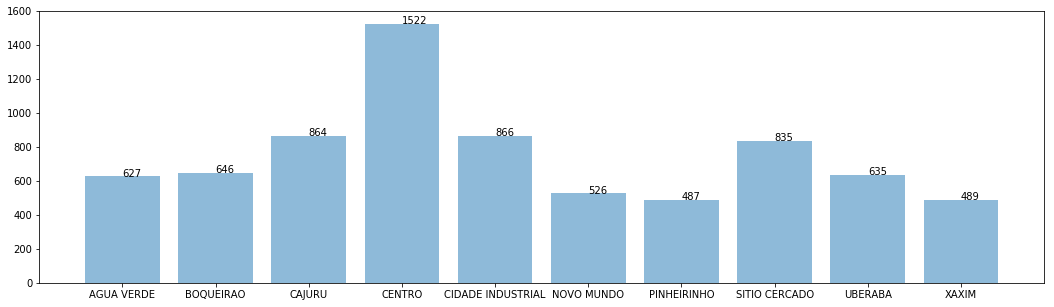

In [22]:
plt.figure(figsize=(18,5))
plt.bar(df_top_bairros['BAIRRO_ASS'], df_top_bairros['count'], align='center', alpha=0.5)
for a,b in zip(df_top_bairros['BAIRRO_ASS'], df_top_bairros['count']):
    plt.text(a, b, str(b))
plt.show()

In [23]:
#TOP Atendimentos por Assunto
df_top_assuntos = df.groupby('ASSUNTO')['ASSUNTO'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

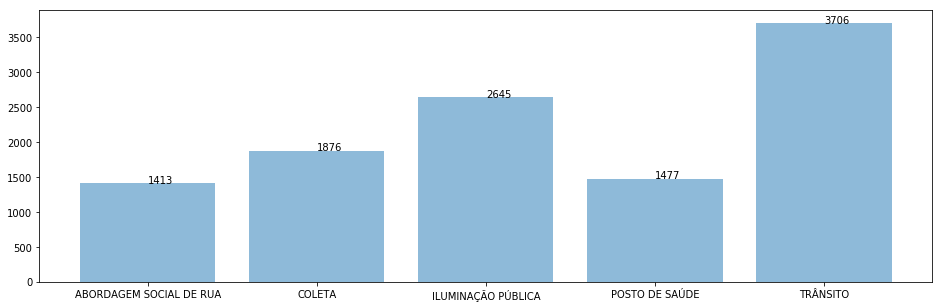

In [24]:
plt.figure(figsize=(16,5))
plt.bar(df_top_assuntos['ASSUNTO'], df_top_assuntos['count'], align='center', alpha=0.5)
for a,b in zip(df_top_assuntos['ASSUNTO'], df_top_assuntos['count']):
    plt.text(a, b, str(b))
plt.show()

In [25]:
#TOP Atendimentos por Tipo
df_top_tipos = df.groupby('TIPO')['TIPO'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

In [26]:
df_top_tipos

,TIPO,count
5,SOLICITAÇÃO,16123
4,RECLAMAÇÃO,2268
1,ELOGIO,471
3,RECADASTRO,231
2,INFORMAÇÃO,104


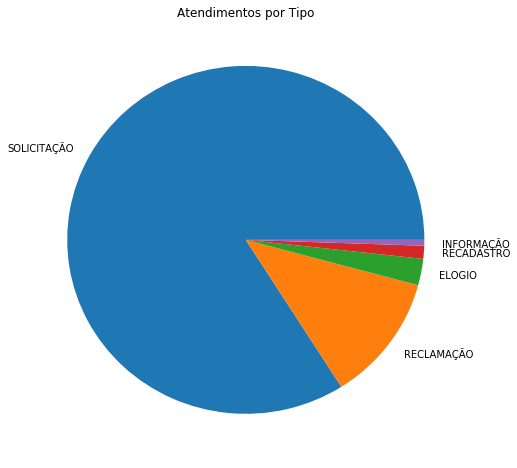

In [27]:
plt.figure(figsize=(8,8))

plt.pie(df_top_tipos['count'], labels = df_top_tipos['TIPO'])
plt.title('Atendimentos por Tipo')
plt.show()

In [28]:
df['RESPOSTA_FINAL'].unique()

array(['Conclusão - Automática', 'Envio do e-mail de resposta',
       'Resposta do RSO aprovada pelo CSO', 'Protocolo Consultado',
       'Conclusão - Meio de resposta "Nenhum"',
       'Responder para o solicitante',
       'Pesquisa não realizada: Recusa do Cidadão',
       'Revisado pelo Supervisor',
       'Conclusão após tentativas de contato para resposta.',
       'Documento "lido" pelo RSO', 'Solicita Parecer',
       'Verificação de Solicitação Concluída',
       'Respondido fora do Prazo de Resposta',
       'Pesquisa não realizada: Desnecessária', 'Resposta ao Parecer',
       'Pesquisa realizada', 'Resposta não aceita',
       'Conclusão - Resposta Aceita',
       'Documento "lido" pelo RSO, mas ainda não enc. para execução',
       'Retirada da Pendência de Revisão',
       'Conclusão - Cidadão recusou a ouvir a resposta',
       'Resposta do RSO alterada pelo CSO', 'Impressão', 'Recadastro',
       'Alteração na Solicitação', 'Encaminhado ao SIGMU',
       'RESPOSTA NÃO 

In [29]:
# assunto ILUMINAÇÃO PÚBLICA VS dia da semana
df['DIA DA SEMANA'] = df['DATA'].dt.dayofweek

In [30]:
df_iluminacao_diadasemana = df[df['ASSUNTO'] == 'ILUMINAÇÃO PÚBLICA'].groupby('DIA DA SEMANA')['DIA DA SEMANA'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(7)

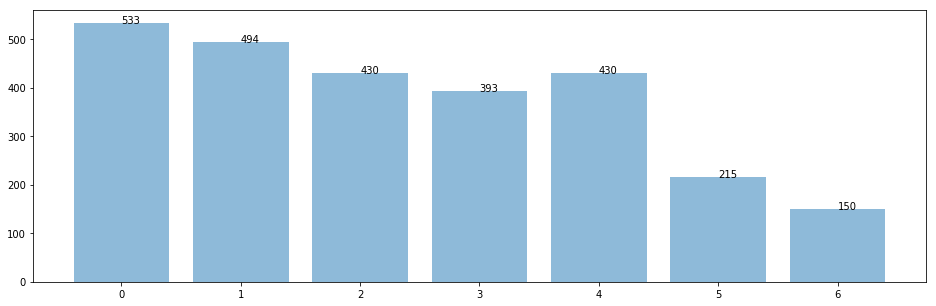

In [31]:
plt.figure(figsize=(16,5))
plt.bar(df_iluminacao_diadasemana['DIA DA SEMANA'], df_iluminacao_diadasemana['count'], align='center', alpha=0.5)
for a,b in zip(df_iluminacao_diadasemana['DIA DA SEMANA'], df_iluminacao_diadasemana['count']):
    plt.text(a, b, str(b))
plt.show()

In [32]:
df_fev = df[(df['DATA'] >= '2019-02-01') & (df['DATA'] < '2019-03-01')]

In [33]:
#Atendimentos em fevereiro
len(df_fev) 

19339

In [34]:
# Solicitações ou Informações em fevereiro
len(df_fev[(df_fev['TIPO'] == 'SOLICITAÇÃO') | (df_fev['TIPO'] == 'INFORMAÇÃO')]) 

16224

In [35]:
df_fev['MEIO_RESPOSTA'].unique()

array(['EMAIL', 'TELEFONE', 'NENHUM', 'PESSOALMENTE'], dtype=object)

In [36]:
df_fev.groupby('MEIO_RESPOSTA')['MEIO_RESPOSTA'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,MEIO_RESPOSTA,count
0,EMAIL,12654
1,NENHUM,3709
3,TELEFONE,2966
2,PESSOALMENTE,10
